# **`Cleaning Google Playstore data`**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [18]:
df = pd.read_csv("googleplaystore.csv")

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<Axes: >

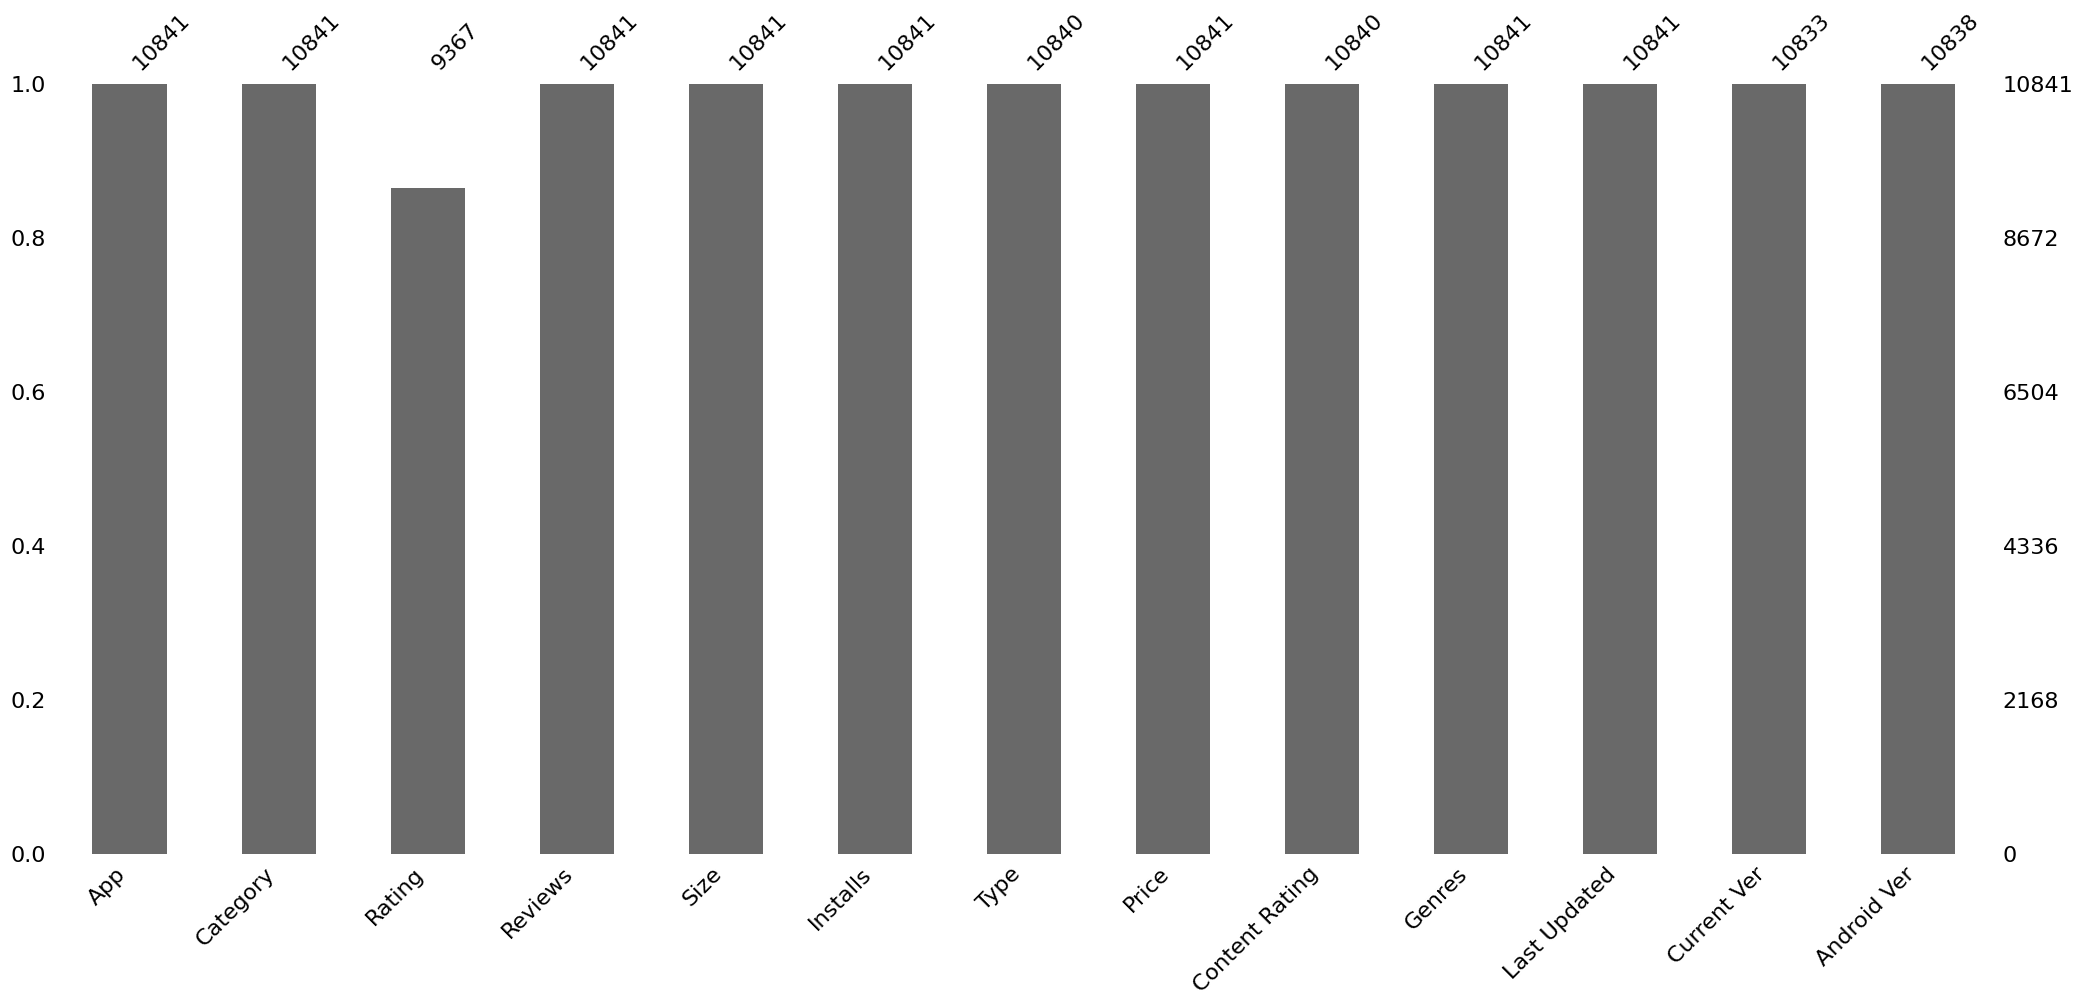

In [22]:
msno.bar(df)

In [23]:
df.isna().sum().sort_values(ascending=False)

,0
Rating,1474
Current Ver,8
Android Ver,3
Type,1
Content Rating,1
App,0
Category,0
Reviews,0
Size,0
Installs,0


### Clean the Rating column and the other columns containing null values

This is a 3-part activity:


*   remove the invalid values form Rating (if any). Just set them as NaN
fill the null values in the Rating column using the mean()
*   clean any other non-numerical columns by just dropping the values
*   Perform the modifications "in place", modifying df. If you make a mistake, re-load the data.








<Axes: >

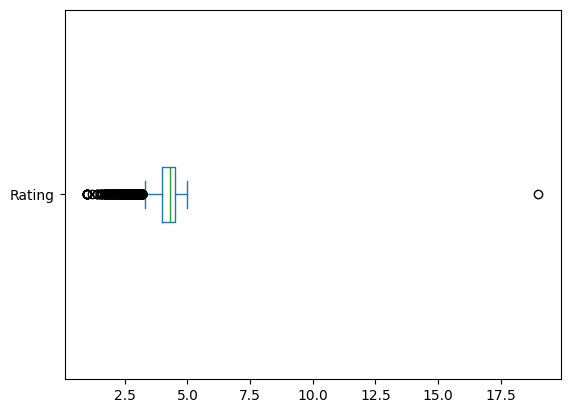

In [30]:
df['Rating'].plot(kind='box', vert=False)

In [32]:
df['Rating'].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [36]:
df.loc[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [38]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [39]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

<ipython-input-39-39d8e0ab3bf4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [41]:
df.dropna(inplace=True)

In [45]:
# Clean the column Reviews and make it numberic
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


In [46]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [47]:
df.info(d)

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.4+ MB


In [49]:
df['Reviews'].isna().sum()

0

In [54]:
# how many duplicated apps are ther?
df['App'].duplicated().sum()

1181

In [70]:
# drop duplicated apps keeping the ones with greatest number of reviewws
df.sort_values('Reviews', ascending=False, inplace=True)
df.drop_duplicates(subset='App', keep='first', inplace=True)


In [72]:
df['Reviews'].info()

<class 'pandas.core.series.Series'>
Index: 9648 entries, 2544 to 5111
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
9648 non-null   int64
dtypes: int64(1)
memory usage: 150.8 KB


### **format the Category column**
Categories are all uppercase and words are seperated using undersocres. Instead, we want them with capitalized in the firest character and the underscores transformed as whitespaces.

Example, the category AUTO_AND_VEHICLES should be transformed to: auto and vehicles.

In [75]:
df['Category'] = df['Category'].str.replace('_', ' ').str.capitalize()
df['Category'].value_counts()

,count
Category,
Family,1828
Game,959
Tools,825
Business,420
Medical,395
Productivity,374
Personalization,374
Lifestyle,369
Finance,345


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 2544 to 5111
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


In [78]:
# convert the installs colums to numeric type
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

In [106]:
# treate Size column as object type
df['Size'] = df['Size'].astype(str)

# Cleaning values
df['Size'] = df['Size'].str.replace('M', '000000') \
                       .str.replace('K', '000') \
                       .str.replace('Varies with device', 'NaN')
#converting to numeric type and ignoring errors
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# convertng to int type after NaN's are handeled
df['Size'] = df['Size'].fillna(0).astype(int)

In [ ]:
# Clean and convert the Price column to numeric.
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [118]:
df[df['Price'] == df['Price'].str.contains(',')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [125]:
df['Price'] = df['Price'].str.replace('$', '')

In [126]:
df['Price'] = df['Price'].str.replace('Free', '0')

In [128]:
df['Price'].info()

<class 'pandas.core.series.Series'>
Index: 9648 entries, 2544 to 5111
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
9648 non-null   object
dtypes: object(1)
memory usage: 150.8+ KB


In [129]:
# paid or free
df['Distribution'] = 'Free'

In [137]:
# Converting price column to numeric type
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# labelling paid for those who's are having price greater than 0
df.loc[df['Price'] > 0, 'Distribution'] = 'Paid'